In [43]:
#THIS IS A TEST FOR STATIC CASE -- NOT INDICATIVE OF MOBILE CASES

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [44]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

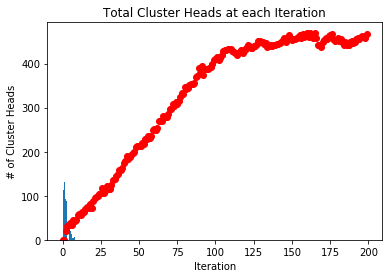

In [45]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [46]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))
    
fig = plt.figure()
hist = plt.hist(data[0])

In [47]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
HTML(animation.to_html5_video())

In [48]:
count = 0
total_nodes = 2000
print("Iteration\t\t    ClusterSize Freq\t\t\tNodes in Cluster\tCluster Heads\t  No Cluster")
#print("\t         \t    0   1   2   3   4   5   6   7   8")
for row in data:
    
    cluster_nodes = 0
    cluster_heads = 0
    count_array = np.bincount(row) 
    for i in range(0,len(count_array)):
        cluster_heads = cluster_heads + count_array[i]
        cluster_nodes = cluster_nodes + count_array[i]*(i+1)
    
    print("  ",count,"\t\t",np.bincount(row),"\t\t    ",cluster_nodes-cluster_heads,"\t\t  ",cluster_heads,"\t\t   ",total_nodes-cluster_nodes)
    count = count+1

Iteration		    ClusterSize Freq			Nodes in Cluster	Cluster Heads	  No Cluster
   0 		 [] 		     0 		   0 		    2000
   1 		 [] 		     0 		   0 		    2000
   2 		 [19] 		     0 		   19 		    1981
   3 		 [26  5  0  1] 		     8 		   32 		    1960
   4 		 [23  3  2  3  3] 		     28 		   34 		    1938
   5 		 [27  1  2  2  2  3  1  1] 		     47 		   39 		    1914
   6 		 [20  1  2  1  1  4  1  2  2] 		     68 		   34 		    1898
   7 		 [30  1  0  2  0  4  4  2  2] 		     81 		   45 		    1874
   8 		 [23  4  2  0  1  1  4  1  7] 		     104 		   43 		    1853
   9 		 [22  6  2  3  0  0  2  1 10] 		     118 		   46 		    1836
   10 		 [29  3  3  5  3  1  0  0 12] 		     137 		   56 		    1807
   11 		 [29  4  2  5  1  3  2  1 12] 		     157 		   59 		    1784
   12 		 [27  1  4  3  3  1  1  2 15] 		     175 		   57 		    1768
   13 		 [30  5  2  2  3  4  1  2 15] 		     187 		   64 		    1749
   14 		 [26  3  3  3  4  3  2  2 16] 		     203 		   62 		    1735
   15 		 [28  6  4  6  3  2  3  